# Laboratory practice № 5 (typical dynamical links)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter

In [2]:
dt = 0.001

In [3]:
t, s, omega  = sympy.symbols('t, s, omega',real=True)

## Task 1 (Explorarion of typical links)

In [4]:
def get_anal_time_characteristics(W_sys):
    weight_func = sympy.inverse_laplace_transform(W_sys, s, t)
    step_func = sympy.inverse_laplace_transform(W_sys/s, s, t)
    return weight_func, step_func

def get_anal_freq_characteristics(W_sys):
    W_freq = W_sys.subs(s,omega*sympy.I)
    mfc = sympy.Abs(W_freq)
    pfc = sympy.functions.elementary.trigonometric.atan2(sympy.im(W_freq),sympy.re(W_freq))
    return mfc, pfc

def plot_time_characteristics(W_sys, params_array, time_arr, x_form = None):
    weight_func_anal, step_func_anal = get_anal_time_characteristics(W_sys)
    weight_func_anal = lambdify(t,weight_func_anal.subs(params_array),'numpy')
    step_func_anal = lambdify(t,step_func_anal.subs(params_array),'numpy')
    
    num, den = sympy.fraction(W_sys.subs(params_array).simplify())
    num_coeffs = list(map(float, sympy.Poly((num.expand()).subs(params_array),s).all_coeffs()))
    den_coeffs = list(map(float, sympy.Poly((den.expand()).subs(params_array),s).all_coeffs()))
    W_tf = ctrl.tf(num_coeffs,den_coeffs)
    
    ir = ctrl.impulse_response(W_tf,time_arr).outputs
    sr = ctrl.step_response(W_tf,time_arr).outputs
    
    fig, ax = plt.subplots(1,2,figsize=(12, 5))
    fig.suptitle(f"Time characteristics for system: ${sympy.latex(W_sys)}$")
    
    ax[0].plot(time_arr,weight_func_anal(time_arr),'b',label="Analytical",linewidth=2)
    ax[0].plot(time_arr,ir,'r--',label="Modeling",linewidth=2)
    ax[0].grid(True)
    ax[0].legend()
    ax[0].set_title("Weight function (impulse response)")
    ax[0].set_xlabel("$t$")
    ax[0].set_ylabel("$y(t)$")
    
    ax[1].plot(time_arr,step_func_anal(time_arr),'b',label="Analytical",linewidth=2)
    ax[1].plot(time_arr,sr,'r--',label="Modeling",linewidth=2)
    ax[1].grid(True)
    ax[1].legend()
    ax[1].set_title("Step response")
    ax[1].set_xlabel("$t$")
    ax[1].set_ylabel("$y(t)$")
    
    if x_form is not None:
        ax[0].xaxis.set_major_formatter(x_form)
        ax[1].xaxis.set_major_formatter(x_form)
    
def plot_freq_characteristics(W_sys, params_array, freq_arr):
    magnitude_freq_char, phase_freq_char = get_anal_freq_characteristics(W_sys)
    magnitude_freq_char = lambdify(omega,magnitude_freq_char.subs(params_array),'numpy')
    phase_freq_char = lambdify(omega,phase_freq_char.subs(params_array),'numpy')
    
    num, den = sympy.fraction(W_sys.subs(params_array).simplify())
    num_coeffs = list(map(float, sympy.Poly((num.expand()).subs(params_array),s).all_coeffs()))
    den_coeffs = list(map(float, sympy.Poly((den.expand()).subs(params_array),s).all_coeffs()))
    W_tf = ctrl.tf(num_coeffs,den_coeffs)
    
    mag, phase, _ = ctrl.bode(W_tf, freq_arr,plot=False)
    
    fig, ax = plt.subplots(2,2,figsize=(12, 10))
    fig.suptitle(f"Frequency characteristics for system: ${sympy.latex(W_sys)}$")
    
    ax[0,0].plot(freq_arr,magnitude_freq_char(freq_arr),'b',label="Analytical",linewidth=2)
    ax[0,0].plot(freq_arr,mag,'r--',label="Modeling",linewidth=2)
    ax[0,0].grid(True)
    ax[0,0].legend()
    ax[0,0].set_title("Magnitude characteristic")
    ax[0,0].set_xlabel("$\omega, \\frac{rad}{s}$")
    ax[0,0].set_ylabel("$A$")
    
    ax[0,1].plot(freq_arr,phase_freq_char(freq_arr),'b',label="Analytical",linewidth=2)
    ax[0,1].plot(freq_arr,phase,'r--',label="Modeling",linewidth=2)
    ax[0,1].grid(True)
    ax[0,1].legend()
    ax[0,1].set_title("Phase characteristic")
    ax[0,1].set_xlabel("$\omega, \\frac{rad}{s}$")
    ax[0,1].set_ylabel("$\phi$")
    
    ax[1,0].plot(freq_arr,magnitude_freq_char(freq_arr),'b',label="Analytical",linewidth=2)
    ax[1,0].plot(freq_arr,mag,'r--',label="Modeling",linewidth=2)
    ax[1,0].grid(True)
    ax[1,0].legend()
    ax[1,0].set_title("Logarithmic magnitude characteristic")
    ax[1,0].set_xscale("log")
    ax[1,0].set_xlabel("$\omega, \\frac{rad}{s}$")
    ax[1,0].set_ylabel("$A$")
    
    ax[1,1].plot(freq_arr,phase_freq_char(freq_arr),'b',label="Analytical",linewidth=2)
    ax[1,1].plot(freq_arr,phase,'r--',label="Modeling",linewidth=2)
    ax[1,1].grid(True)
    ax[1,1].legend()
    ax[1,1].set_title("Logarithmic phase characteristic")
    ax[1,1].set_xscale("log")
    ax[1,1].set_xlabel("$\omega, \\frac{rad}{s}$")
    ax[1,1].set_ylabel("$\phi$")

### System 4

In [5]:
k_e, R, Rl, L = sympy.symbols("k_e R R_l L")
sys = k_e/(s+R/L + Rl/L)
par_arr = [(R,6.7066),(Rl,365),(L,0.4201),(k_e,0.3845)]
times = np.linspace(0,2*10**-2,1000)
freqs = np.linspace(start=10**-6,stop=3*10**5,num=100000)

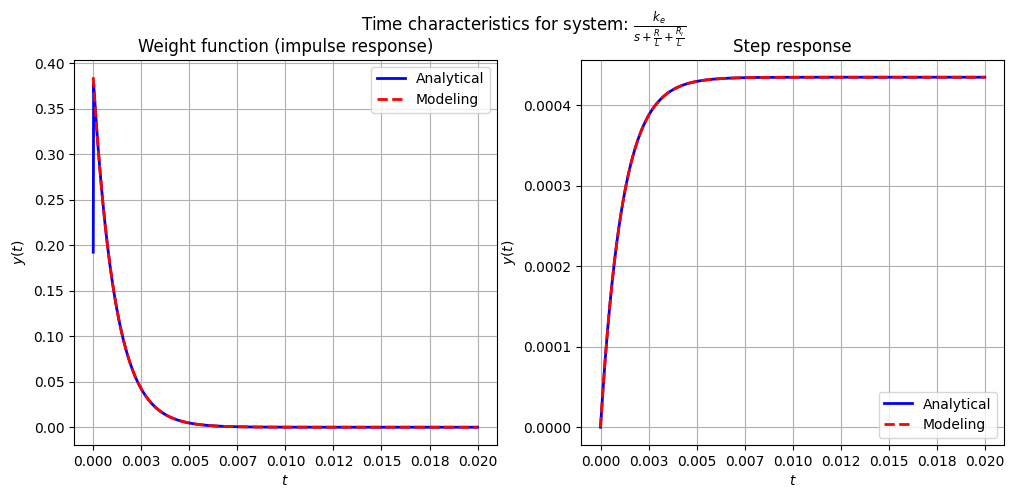

In [6]:
plot_time_characteristics(sys,par_arr,times,FormatStrFormatter('%.3f'))

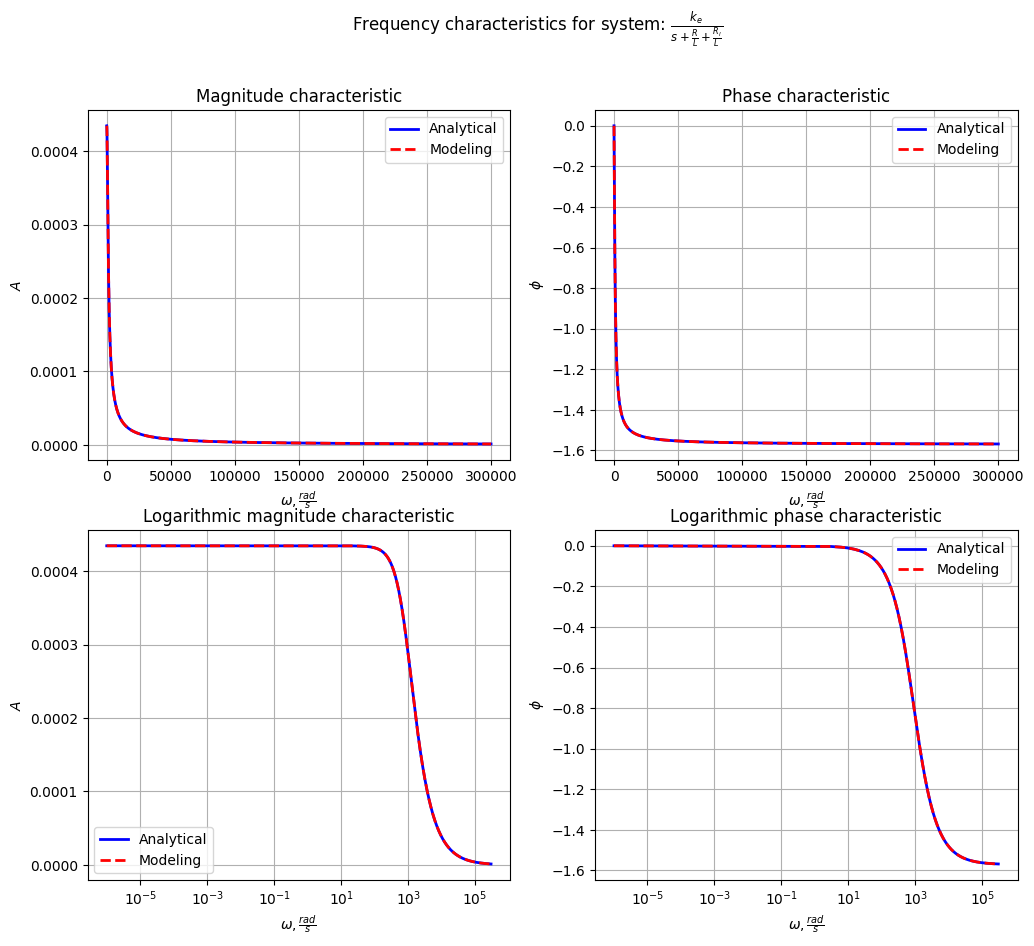

In [7]:
plot_freq_characteristics(sys,par_arr,freqs)